<a href="https://colab.research.google.com/github/GA239/DS_course/blob/master/HW7/tsk1/TIt_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [441]:
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [442]:
# read dataset
DRIVE = '/content/drive/My Drive'
titanic_path = os.path.join(DRIVE, 'titanic3.xls')

In [443]:
import pandas as pd
xl = pd.ExcelFile(titanic_path)
df = xl.parse(xl.sheet_names[0])
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [444]:
df['Family'] = df.parch + df.sibsp
df['Is_Alone'] = df.Family == 0

In [445]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        939
fare          281
cabin         186
embarked        3
boat           28
body          121
home.dest     369
Family          9
Is_Alone        2
dtype: int64

In [446]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'Family',
       'Is_Alone'],
      dtype='object')

Text(0.5, 1.0, 'Missing values heatmap')

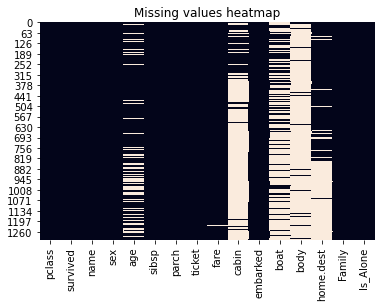

In [447]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [448]:
df.embarked.fillna(df.embarked.mode()[0], inplace = True)
df.cabin = df.cabin.fillna('NA')
df.boat = df.boat.fillna('NA')
df.body = df.body.fillna(0.0)

In [449]:
df['Salutation'] = df.name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
df.drop(['home.dest'], axis=1, inplace=True)
grp = df.groupby(['sex', 'pclass'])
df.age.fillna(grp.age.apply(lambda x: x.fillna(x.median())), inplace = True)
df['Age_Range'] = pd.cut(df.age, [0, 10, 20, 30, 40, 50, 60,70,80])
df['fare_category'] = pd.cut(df['fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

Text(0.5, 1.0, 'Missing values heatmap')

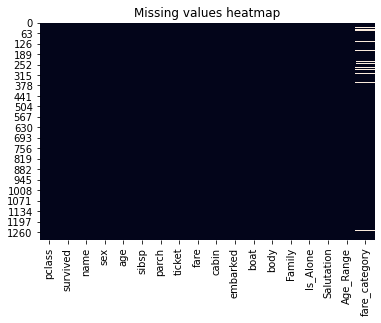

In [450]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [451]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['Is_Alone'] = LabelEncoder().fit_transform(df['Is_Alone'])

In [452]:
df = pd.concat(
    [df,
     pd.get_dummies(df.cabin, prefix="Cabin"),
     pd.get_dummies(df.boat, prefix="boat"),
     pd.get_dummies(df.Age_Range, prefix="Age_Range"), 
     pd.get_dummies(df.embarked, prefix="Emb"), 
     pd.get_dummies(df.Salutation, prefix="Title"),
     pd.get_dummies(df.fare_category, prefix="Fare"), 
     pd.get_dummies(df.pclass, prefix="Class")
], axis=1)
df.drop(['pclass', 'fare','cabin', 'boat', 'fare_category','name','Salutation', 
         'ticket','embarked', 'Age_Range', 'sibsp', 'parch', 'age'], axis=1, inplace=True)

df.drop(['body'], axis=1, inplace=True)

Text(0.5, 1.0, 'Missing values heatmap')

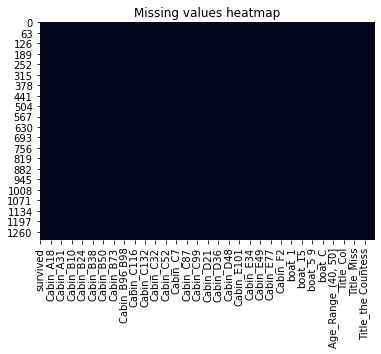

In [453]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [454]:
df.shape

(1309, 256)

In [455]:
output_path = os.path.join(DRIVE, 'titanic_precessed.csv')
df.to_csv(output_path)

In [456]:
df

,survived,sex,Family,Is_Alone,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,Cabin_A20,Cabin_A21,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A29,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_A9,Cabin_B10,Cabin_B101,Cabin_B102,Cabin_B11,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B24,Cabin_B26,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B36,Cabin_B37,...,boat_C,boat_C D,boat_D,boat_NA,"Age_Range_(0, 10]","Age_Range_(10, 20]","Age_Range_(20, 30]","Age_Range_(30, 40]","Age_Range_(40, 50]","Age_Range_(50, 60]","Age_Range_(60, 70]","Age_Range_(70, 80]",Emb_C,Emb_Q,Emb_S,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Fare_Low,Fare_Mid,Fare_High_Mid,Fare_High,Class_1,Class_2,Class_3
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1305,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1306,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1307,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
